Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')  #

#посмотрим на данные с разных сторон 

In [2]:
stud.shape  # оценим габариты

(395, 30)

In [3]:
stud.describe()   # и базовую описательную статистику для числовых столбцов

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [4]:
stud.info()  # ну конечно, сводная по всему данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# только три парамера не имеют пропусков
# поточнее, что там с пропусками?
stud.isnull().sum().sort_values(ascending=False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
age                     0
sex                     0
school                  0
dtype: int64

<AxesSubplot:>

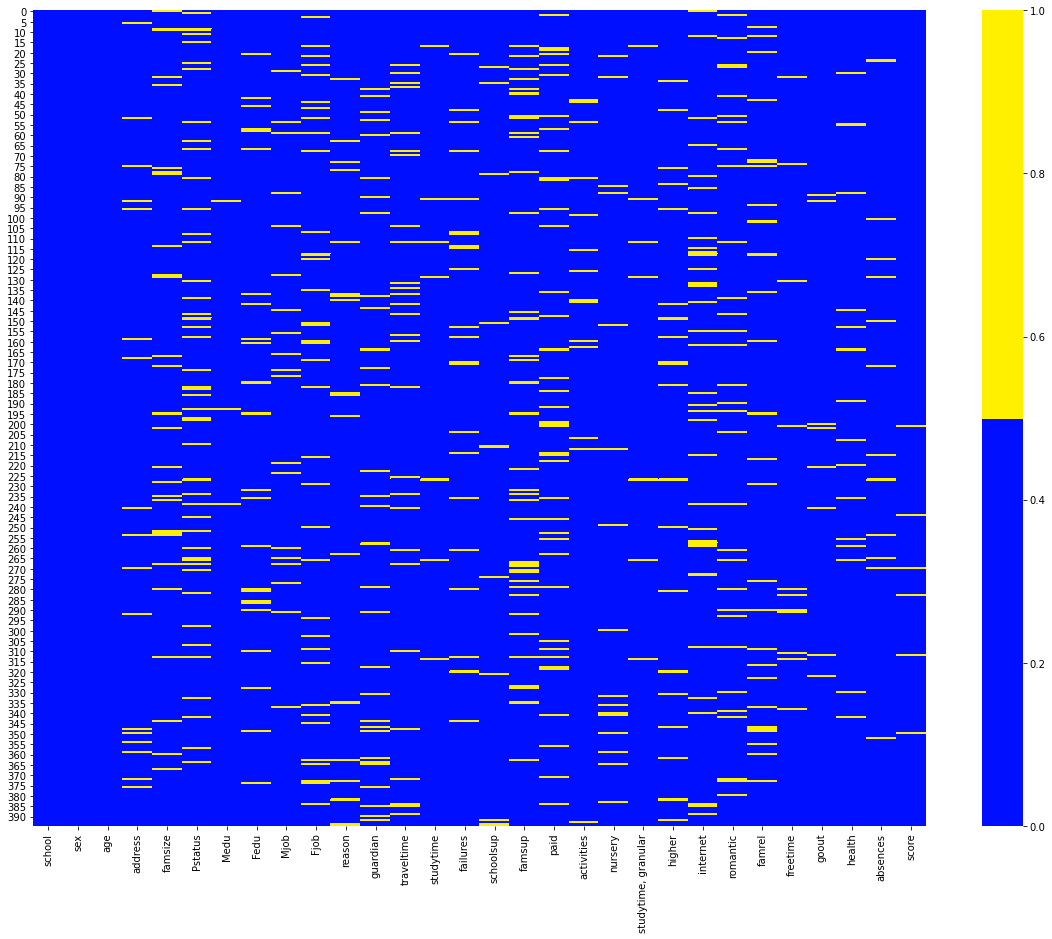

In [6]:
# а еще визуально на все сразу поглядим  на пропуски
cols = stud.columns[:]
# желтый - пропущенные данные, синий - не пропущенные
plt.subplots(figsize=(20, 15))
colours = ['#000fff', '#fff000']
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
# выбор числовых колонок
stud_numeric = stud.select_dtypes(include=[np.number])
stud_num_cols = stud_numeric.columns  # class 'pandas.core.indexes.base.Index'
print(stud_num_cols)
stud_numeric

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


In [8]:
# отбор нечисловых колонок
stud_n_numeric = stud.select_dtypes(exclude=[np.number])
stud_n_num_cols = stud_n_numeric.columns
print(stud_n_num_cols)
stud_n_numeric

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,NaN,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,NaN,NaN,no,no,no,no,NaN,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


<AxesSubplot:>

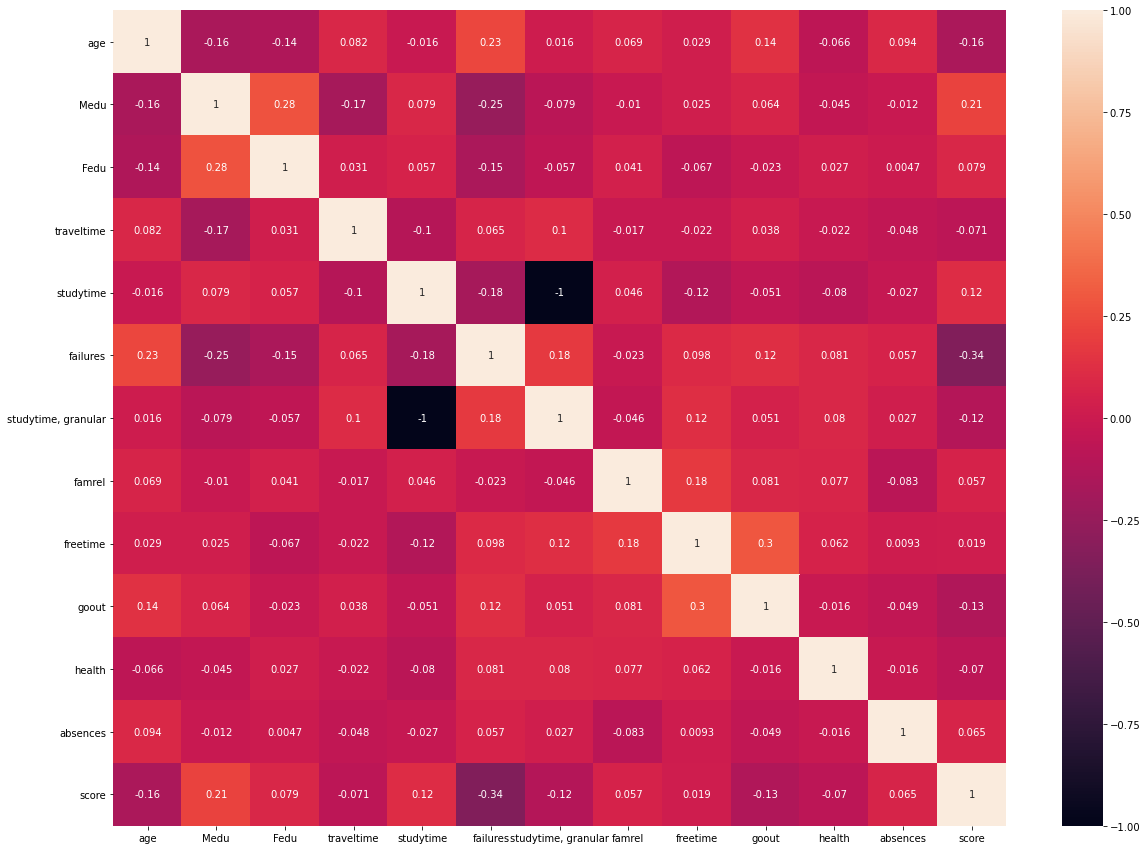

In [9]:
# как данные , пока необработанные коррелируют между собой ? может попадется что-то интересное
plt.subplots(figsize=(20, 15))
sns.heatmap(stud.corr(), annot=True)

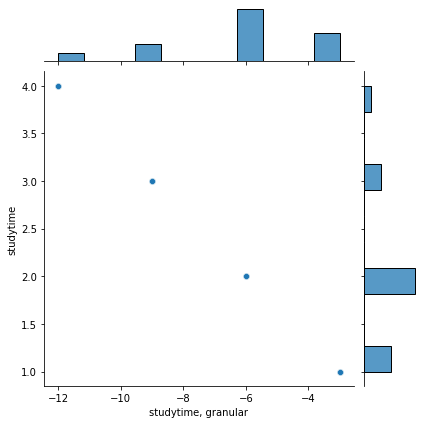

In [10]:
# интересный черный квадрат -1!
# есть гипотеза, что  это две переменные с максимальным влиянием и даже с одинаковым колличеством пропусков,
#  вариантами значений и схожим именем , но различными величинами измерения
# проверим зависимость одной ввеличины от другой визуально
sns.jointplot(x='studytime, granular',
              y='studytime',
              data=stud)
# линейность зависимости приводит к мысли о том что один и тотже параметр, но в разных системах отсчета
# 'studytime, granular' = 'studytime' * -3
# избавимся от 'studytime, granular'
stud.drop(['studytime, granular'], inplace=True, axis=1)

In [11]:
# пересчитаем число числовых колонок
stud_numeric = stud.select_dtypes(include=[np.number])
stud_num_cols = stud_numeric.columns  # class 'pandas.core.indexes.base.Index'
print(stud_num_cols)
stud_numeric

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [12]:
# Присмотримся к остальным столбцам

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


<AxesSubplot:>

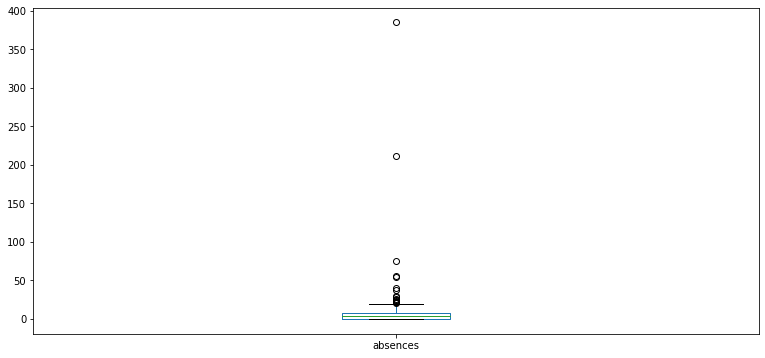

In [13]:
import math

print(stud.absences.value_counts(dropna=False))
stud.absences.plot(kind='box')

In [14]:
# печально смотрится разброс значений пропуска занятий,
# одно дело когда нет пропусков или есть 1-2, но совсем иначе когда их от 5 до 10,
# а когда их становится, например, больше 15,то тут, и 20, и 30  это уже почти одно и тоже.
# число пропусков будет правильнее приветсти к логарифмической шкале
# например по основанию 2,
# 0 - оставим как есть , пустые - станем тянуть к медиане,
# но в данных есть выброс и сначала установим равным  1 , выброс на 385
# потом все остальное = log2
stud.absences.loc[stud.absences > 300] = 1  # установим равным  1 , выброс 385
# заполним пустые isnon медианой


def replace_isnon_med(df, col):  # функция замены пропусков в столбцах на медиану
    med_col = df[col].median(axis=0)  # вычисляем медиану столбца
    df[col] = df[col].fillna(med_col)  # заполняем пропуски
    return df


replace_isnon_med(stud, 'absences')
# приведем значения пропусков занятий к логарифмической шкале округлив до ближ целого
stud.absences = stud.absences.apply(
    lambda x: round(math.log2(x)) if x > 0 else x)

C:\Users\flash\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0.0    115
3.0     80
2.0     78
1.0     60
4.0     50
5.0      8
6.0      3
8.0      1
Name: absences, dtype: int64


<AxesSubplot:>

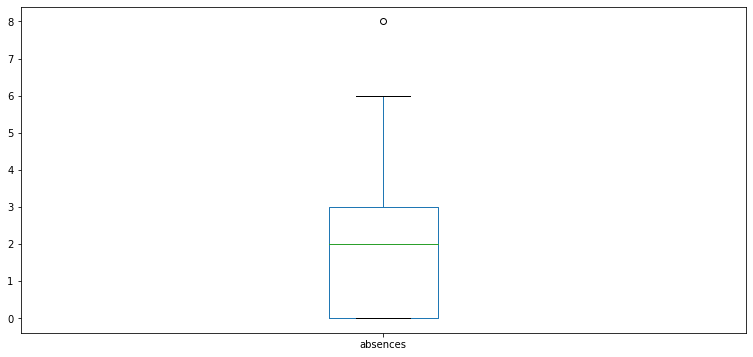

In [15]:
print(stud.absences.value_counts(dropna=False))
stud.absences.plot(kind='box')
#так намного нагляднее хотя и единицы измерения стали относительны

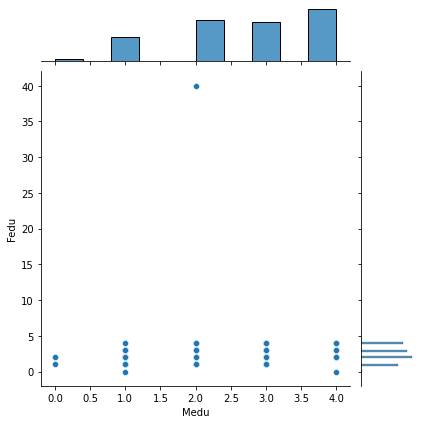

In [16]:
# разберемся с семейными взаимоотношениями
# начнем с образования родителей
# посмотрим каково взаимное влияние уровя образования отца и матери

sns.jointplot(x='Medu',
              y='Fedu',
              data=stud)
# что-то пошло не так

In [17]:
# посмотрим на значения переменных Medu & Fedu в датасете может присутствуют аномалии
print(stud.Medu.value_counts(dropna=False))
print(stud.Fedu.value_counts(dropna=False))

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64


In [18]:
# одно из значений (выброс) в колонке Fedu возможно следсттвие опечатки при вводе данных и видимо 4.0
# поправим значение
stud.Fedu.loc[stud.Fedu > 4] = 4  # установим равным  4 , выброс 40

C:\Users\flash\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


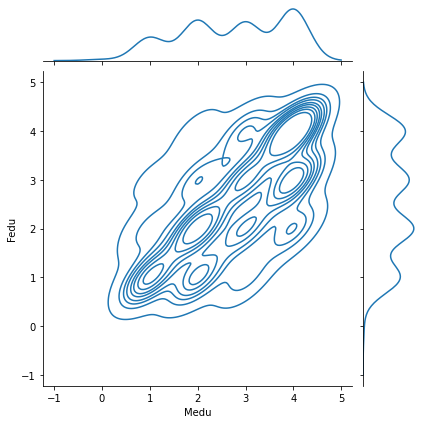

In [19]:
sns.jointplot(x='Medu', y='Fedu', kind='kde', data=stud)

In [20]:
# заполнение пропусков наиболее релевантным значением
# есть гипотеза, что пропуски в  параметре Fedu заполнять в зависимости от значения  Medu И наоборот (зто видно по выборке)
# но пропусков всего в двух колонках менее 10% от от общего числа и приведение их к наиболее частому тоже легально
def replace_isnon_rel(df, col):
    rel_col = df[col].value_counts().index[0]  # самое частое
    df[col] = df[col].fillna(rel_col)  # заполняем пропуски
    return df


replace_isnon_rel(stud, 'Fedu')
replace_isnon_rel(stud, 'Medu')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,3.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,2.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,3.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,1.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,8.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,2.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,2.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


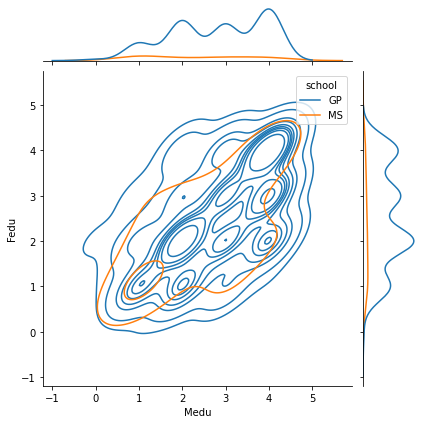

In [21]:
sns.jointplot(x='Medu',
              y='Fedu',
              hue='school',
              kind='kde',
              data=stud)

# гипотеза №- 
если предположить раз мы ищем зависимость от score то 0 значения могут быть как пропусками в данных,
так и еще не пройденными тестами, и в меньшей степени 0 = результат теста по математике(хотя бывает)
в пользу такого довода говорит то, что отсуствуют значения в диапазоне от 0 до 20 ,или почти  до 25-35

так как подаляющее большинство значений находится в диапазоне от 40 до 70
стороки с пропусками на score заполнять  медианными значениями, а так же присвоить медиану 
и тем кто не прошел еще тест (score=0)=median

в противном случае результат 0 в оценке  искажает результат и может привести к неверному заключению
либо, что равносильно присваиванию медианы.
И как вариант - всех учеников с результатом 0 и None нужно вывести в отдельный , дополнительный датафрейм и на основании данных полученных в иследовании параметров основного строить прогнозы о возможном результате оценки score. 


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


<AxesSubplot:>

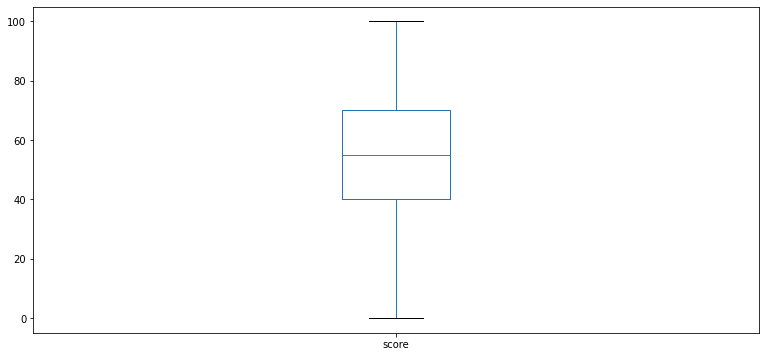

In [22]:
print(stud.score.value_counts(dropna=False))
stud.score.plot(kind='box')

In [23]:
def replace_isnon_med(df, col): # функция замены пропусков в столбцах на медиану
    med_col = df[col].median(axis=0)# вычисляем медиану столбца
    df[col] = df[col].fillna(med_col)# заполняем пропуски
    return df
replace_isnon_med(stud, 'score')
stud.score = stud.score.apply(lambda x: stud['score'].median(axis=0) if x == 0 else x)

<AxesSubplot:>

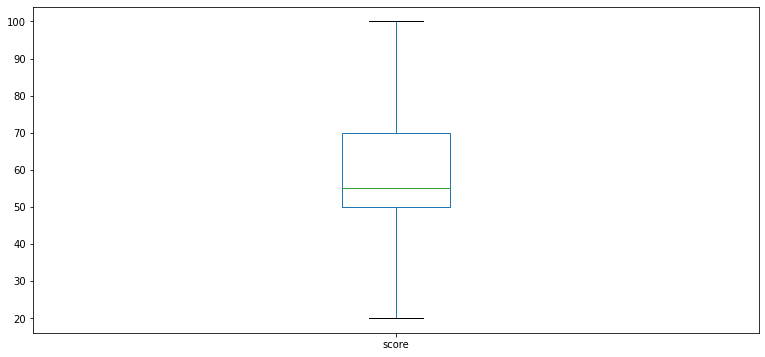

In [24]:
stud.score.plot(kind='box')

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,3.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,2.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,3.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,1.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,8.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,2.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,2.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


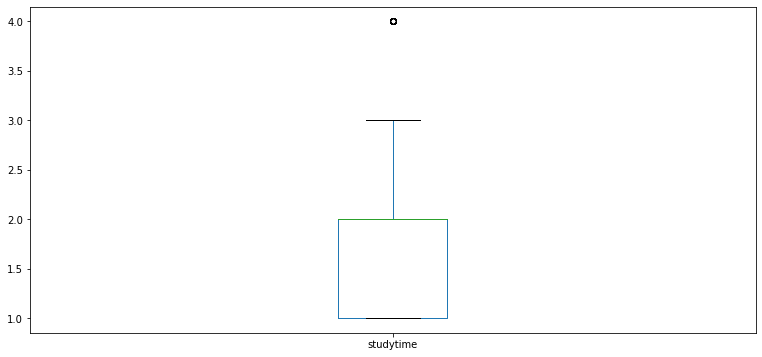

In [25]:
# время на учёбу помимо школы в неделю имеет несколько пропусков, но отвязанно от реального времени и у подавляющего
# большинства учеников  занимает не более 5 часов в неделю заполнение пропусков релевантным значением тут уместно
# 
print(stud.studytime.value_counts(dropna=False))
stud.studytime.plot(kind='box')

# заполнение пропусков наиболее релевантным значением

replace_isnon_rel(stud, 'studytime')

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


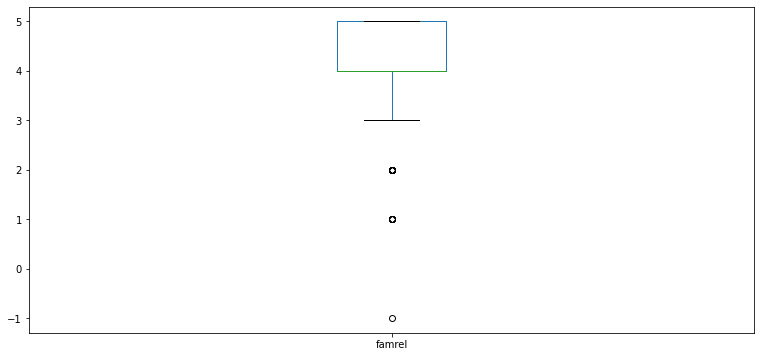

In [26]:
print(stud.famrel.value_counts(dropna=False))
stud.famrel.plot(kind='box')
#гипотеза возможно отношения в семье настолько плохи что -1 и есть реальность, но приведем ее в диапазон разрешенных значений 
stud.famrel = stud.famrel.apply(lambda x: 1 if x <= 1 else x)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


<AxesSubplot:>

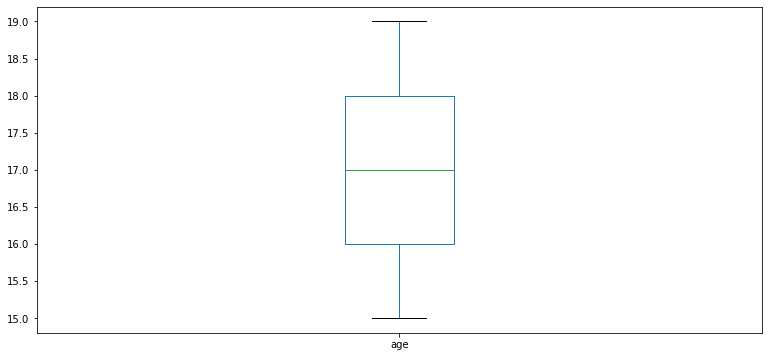

In [27]:
# в колонке age нет пропусков, но учеников чей возраст 20+ всего 5, этого мало для сравнения и анализа
# их можно исключить из данной выборки , но возможно в других они будут полезны - тут же это выбросы
print(stud.age.value_counts(dropna=False))
# исключим их влияние на остальные данные 

stud = stud[stud.age < 20]
stud.age.plot(kind='box')


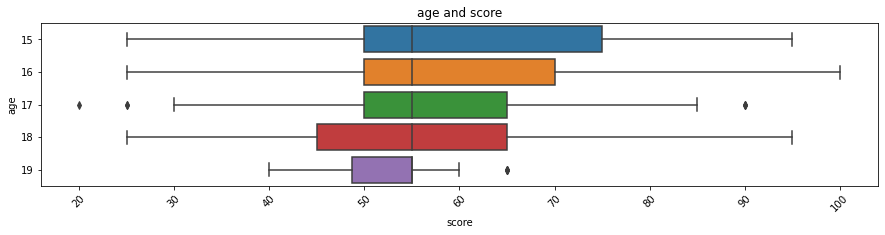

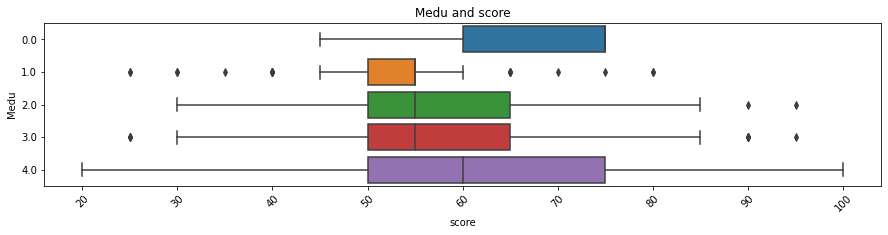

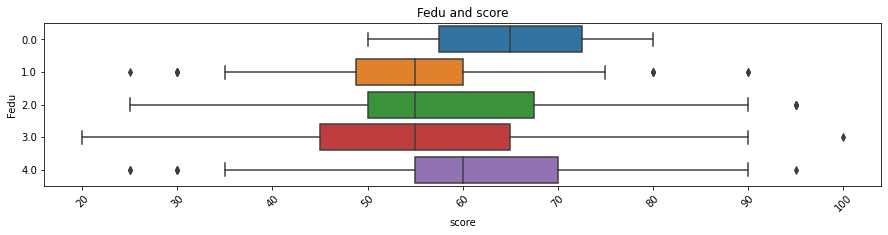

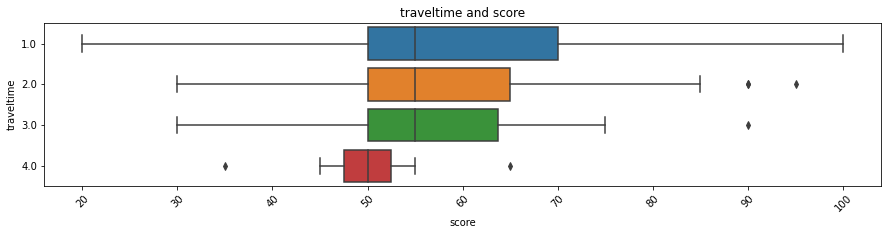

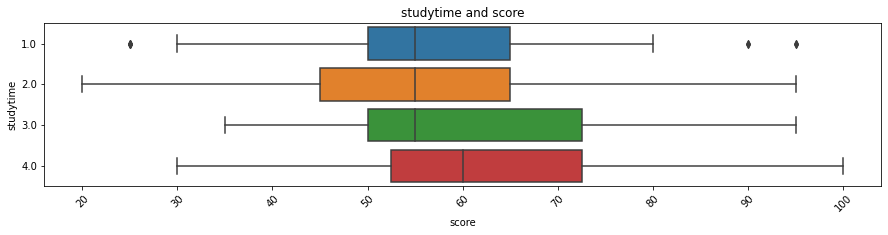

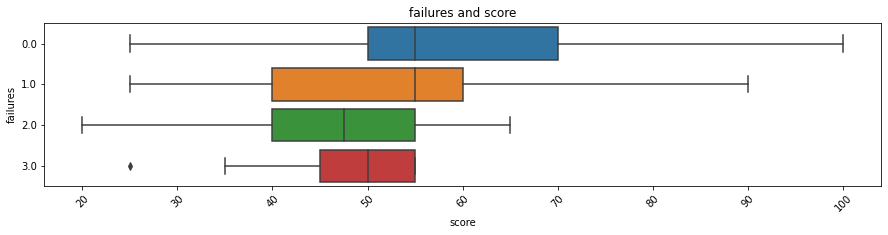

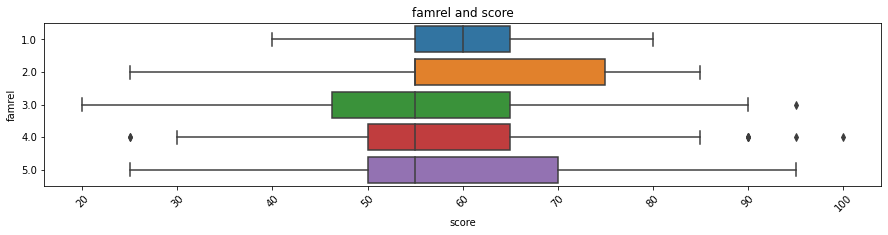

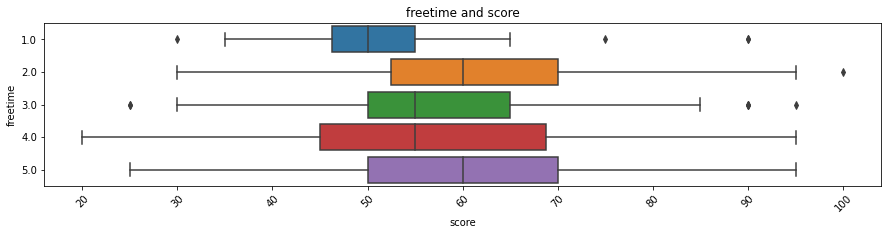

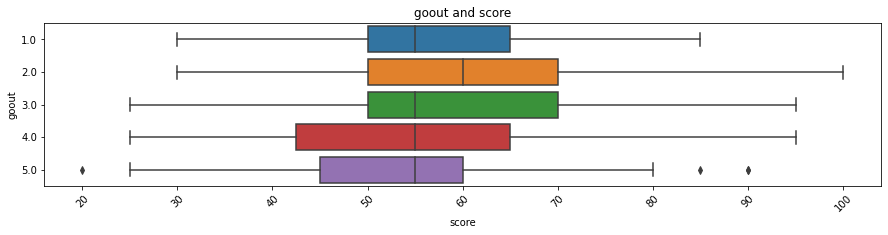

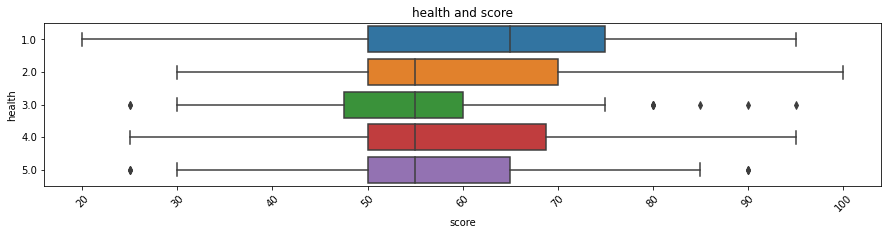

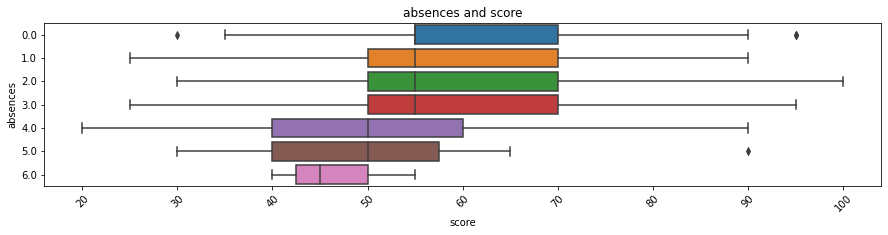

In [28]:
# посмотрим на boxplot для численных значений
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(15, 3))
    sns.boxplot(y=column, x='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax, orient='h')
    plt.xticks(rotation=45)
    ax.set_title(column + ' and score')
    plt.show()


for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

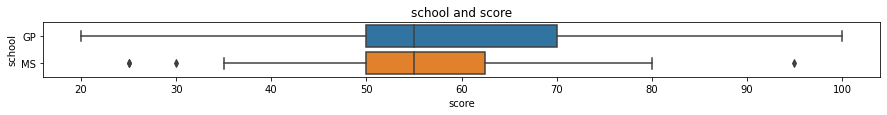

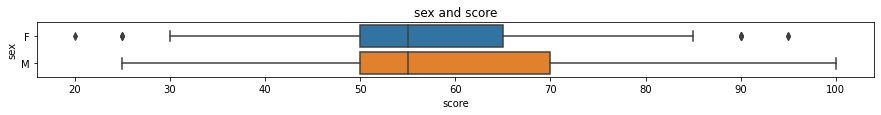

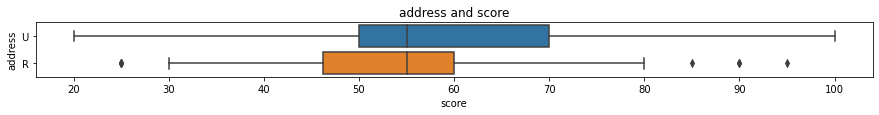

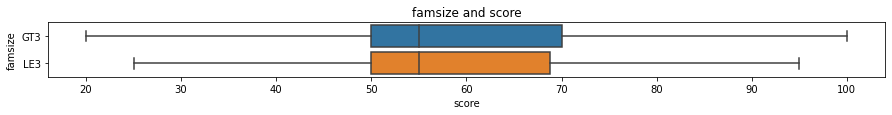

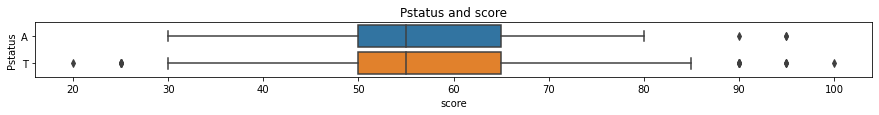

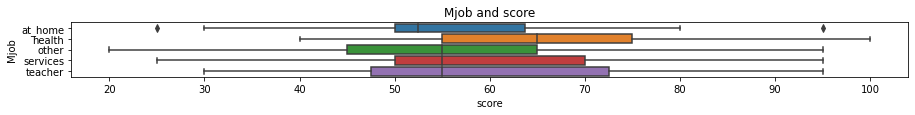

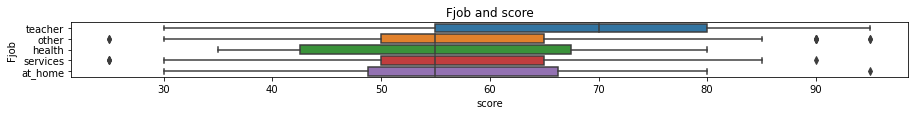

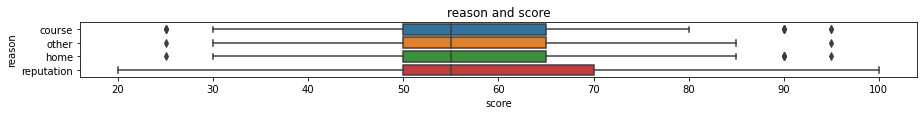

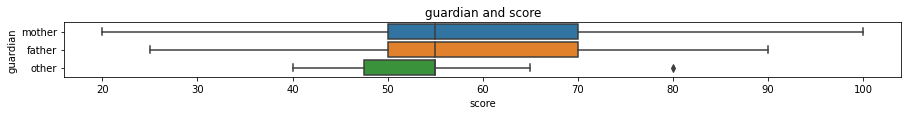

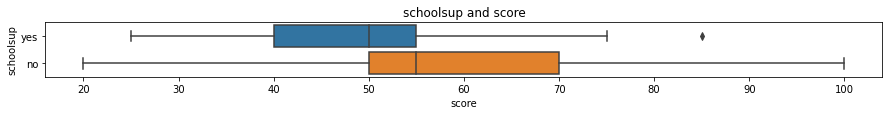

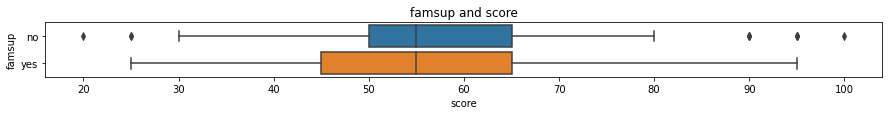

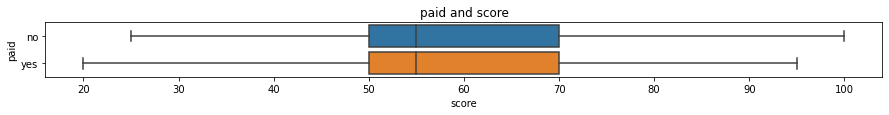

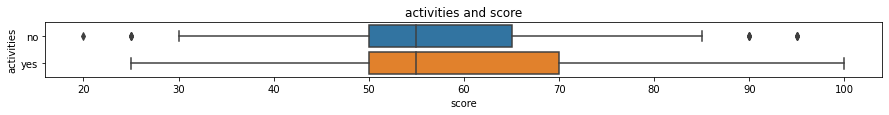

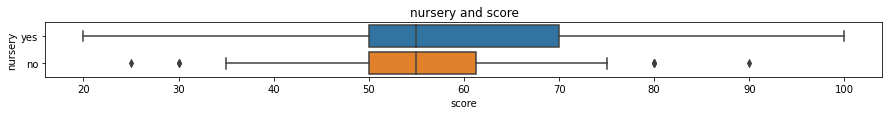

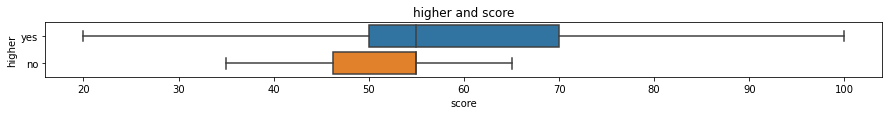

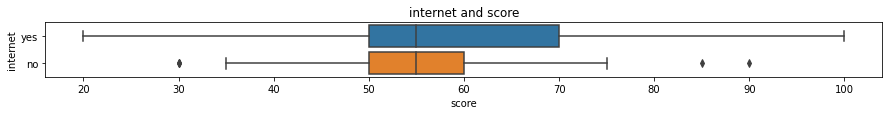

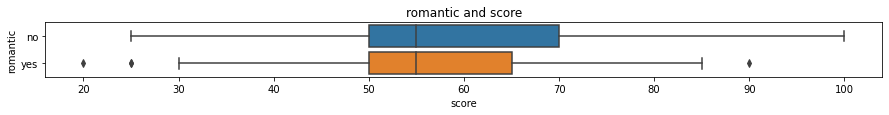

In [29]:
# посмотрим на boxplot для номинативных переменных в отношении к score

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (15, 1))
    sns.boxplot(y=column, x='score',
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:5])],
               ax=ax, orient='h')
    #plt.xticks(rotation=45)
    ax.set_title(column  + ' and score')
    #plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [30]:
# функция замены пропусков в нечисловых столбцах на самое релевантное
for column in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']:
    replace_isnon_rel(stud, column)

<ipython-input-20-f439c010dcd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(rel_col)  # заполняем пропуски


In [31]:
#777777

In [32]:
# функция замены пропусков в числовых столбцах на медиану
replace_isnon_med(stud, stud_num_cols)

C:\Users\flash\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,3.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,2.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,3.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,1.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,yes,no,1.0,1.0,1.0,5.0,0.0,55.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,2.0,80.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<AxesSubplot:>

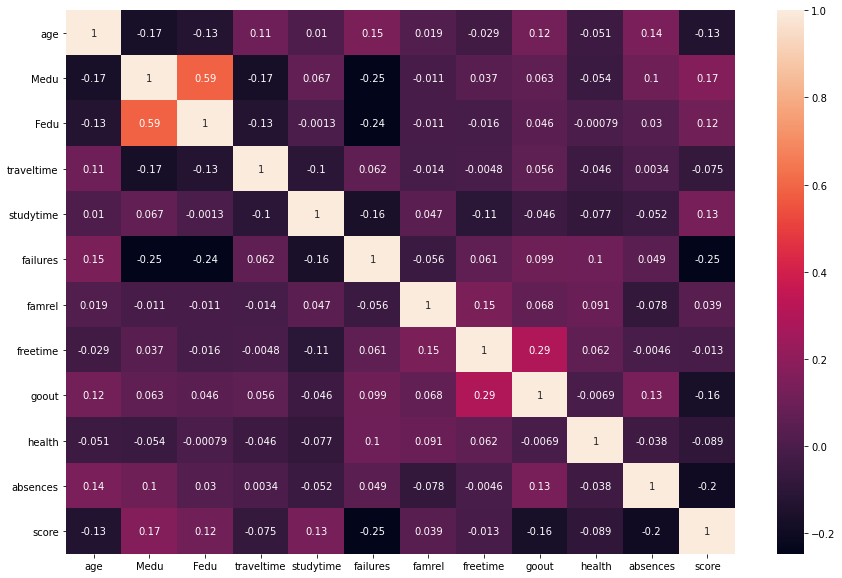

In [33]:
#как данные ,  коррелируют между собой
plt.subplots(figsize=(15,10))

sns.heatmap(stud.corr(),annot = True) #annot = True

In [34]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:7]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for column in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'failures', 'studytime', 'traveltime',
               'nursery', 'higher', 'internet', 'romantic', 'absences', 'Medu', 'Fedu', 'health', 'freetime', 'famrel']:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu


2
['U' 'R']
count     390
unique      2
top         U
freq      308
Name: address, dtype: object


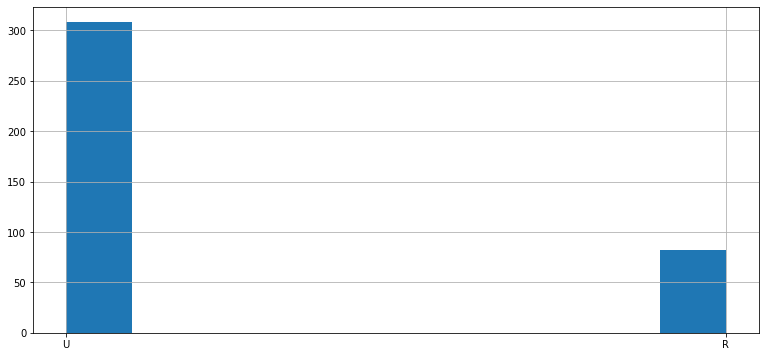

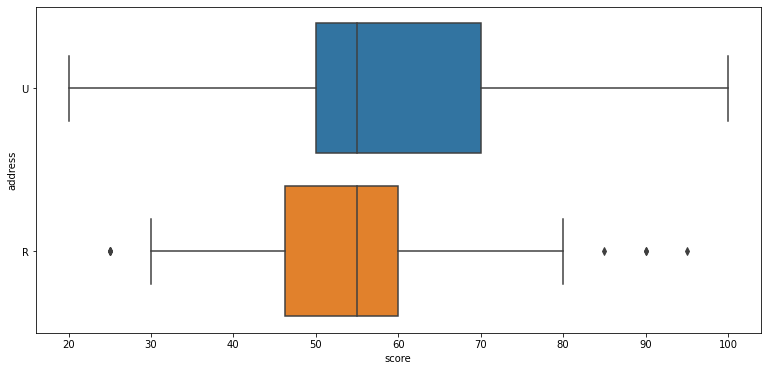

In [35]:
# быстрый взгляд на параметр
def fast_wiz(param, cmpare):
    print(stud[param].nunique())
    print(stud[param].unique())
    print(stud[param].describe())
    stud[param].hist()
    #sns.pairplot(stud[[param, cmpare]])
    plt.show()
    sns.boxplot(y=param, x=cmpare,
                data=stud.loc[stud.loc[:, param].isin(stud.loc[:, param].value_counts().index[:10])], orient='h')


fast_wiz('address', 'score')

In [36]:
# запись обработанных данных в файл
stud.to_csv('midle.csv',  index=False)